In [1]:
#Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
#Read all files
file_paths = ['Cab_Data.csv', 'City.csv', 'Customer_ID.csv', 'Transaction_ID.csv']
cabs, cities, customers, transactions = [pd.read_csv(file_path) for file_path in file_paths]

## First dataset "Cab_Data"

In [3]:
cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cabs['Date of Travel'] = pd.to_datetime(cabs['Date of Travel'], unit='D', origin='1899-12-30')
cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
cabs.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


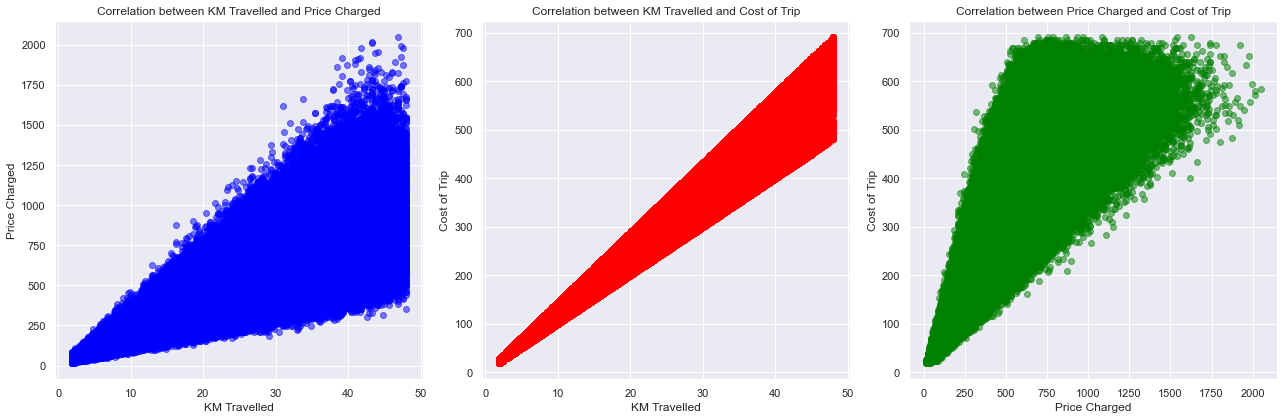

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(cabs['KM Travelled'], cabs['Price Charged'], color='blue', alpha=0.5)
axes[0].set_xlabel('KM Travelled')
axes[0].set_ylabel('Price Charged')
axes[0].set_title('Correlation between KM Travelled and Price Charged')

axes[1].scatter(cabs['KM Travelled'], cabs['Cost of Trip'], color='red', alpha=0.5)
axes[1].set_xlabel('KM Travelled')
axes[1].set_ylabel('Cost of Trip')
axes[1].set_title('Correlation between KM Travelled and Cost of Trip')

axes[2].scatter(cabs['Price Charged'], cabs['Cost of Trip'], color='green', alpha=0.5)
axes[2].set_xlabel('Price Charged')
axes[2].set_ylabel('Cost of Trip')
axes[2].set_title('Correlation between Price Charged and Cost of Trip')

plt.tight_layout()

cabs['Profit'] = cabs['Price Charged'] - cabs['Cost of Trip']
cabs = cabs.drop(columns=['Price Charged', 'Cost of Trip'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(cabs['KM Travelled'], cabs['Profit'], color='blue', alpha=0.5)
axes[0].set_xlabel('KM Travelled')
axes[0].set_ylabel('Profit')
axes[0].set_title('Correlation between KM Travelled and Profit')

axes[1].scatter(cabs['KM Travelled'], cabs['Profit'], color='red', alpha=0.5)
axes[1].set_xlabel('KM Travelled')
axes[1].set_ylabel('Profit')
axes[1].set_title('Correlation between KM Travelled and Profit')

plt.tight_layout()

## Second dataset "City"

In [8]:
cities.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [10]:
cities['Population'] = cities['Population'].str.replace(',', '').str.strip().astype(int)
cities['Users'] = cities['Users'].str.replace(',', '').str.strip().astype(int)

In [11]:
cities.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


Text(0.5, 1.0, 'Correlation between Population and Users')

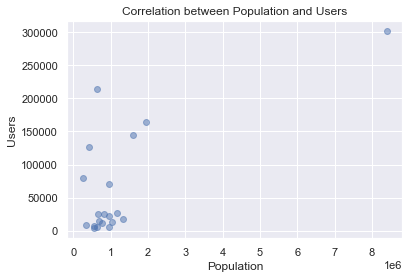

In [12]:
plt.scatter(cities['Population'], cities['Users'], alpha=0.5)
plt.xlabel('Population')
plt.ylabel('Users')
plt.title('Correlation between Population and Users')

## Third dataset "Customer_ID"

In [13]:
customers.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
customers.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


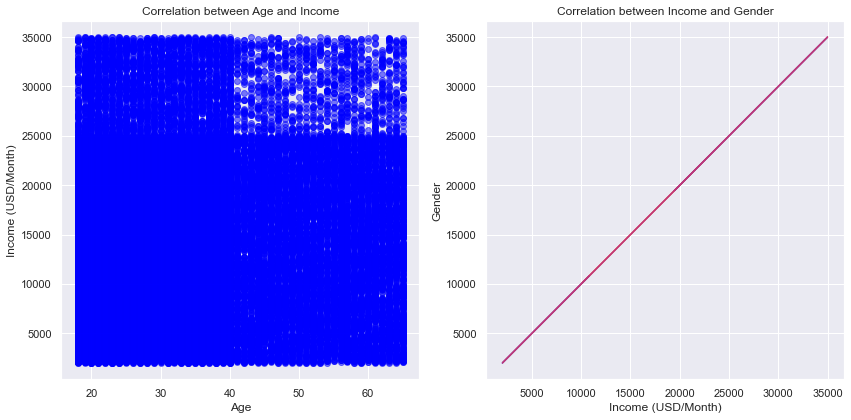

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(customers['Age'], customers['Income (USD/Month)'], color='blue', alpha=0.5)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Income (USD/Month)')
axes[0].set_title('Correlation between Age and Income')

axes[1].plot(customers['Income (USD/Month)'][customers['Gender']=='Male'], 
             customers['Income (USD/Month)'][customers['Gender']=='Male'], c='blue', alpha=0.5, label='Male')
axes[1].plot(customers['Income (USD/Month)'][customers['Gender']=='Female'], 
             customers['Income (USD/Month)'][customers['Gender']=='Female'], c='red', alpha=0.5, label='Female')
axes[1].set_xlabel('Income (USD/Month)')
axes[1].set_ylabel('Gender')
axes[1].set_title('Correlation between Income and Gender')

plt.tight_layout()

## Forth dataset "Transaction_ID"

In [17]:
transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [18]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [19]:
transactions.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


## Create master data

In [20]:
merged_cabs_cities = pd.merge(cabs, cities, on='City', how='inner')

merged_cabs_cities_transactions = pd.merge(merged_cabs_cities, transactions, on='Transaction ID', how='inner')

all_data = pd.merge(merged_cabs_cities_transactions, customers, on='Customer ID', how='inner')
all_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237


In [21]:
all_data.duplicated().sum()

0

Conclusion: There are no missing values and no duplicates in the data. 

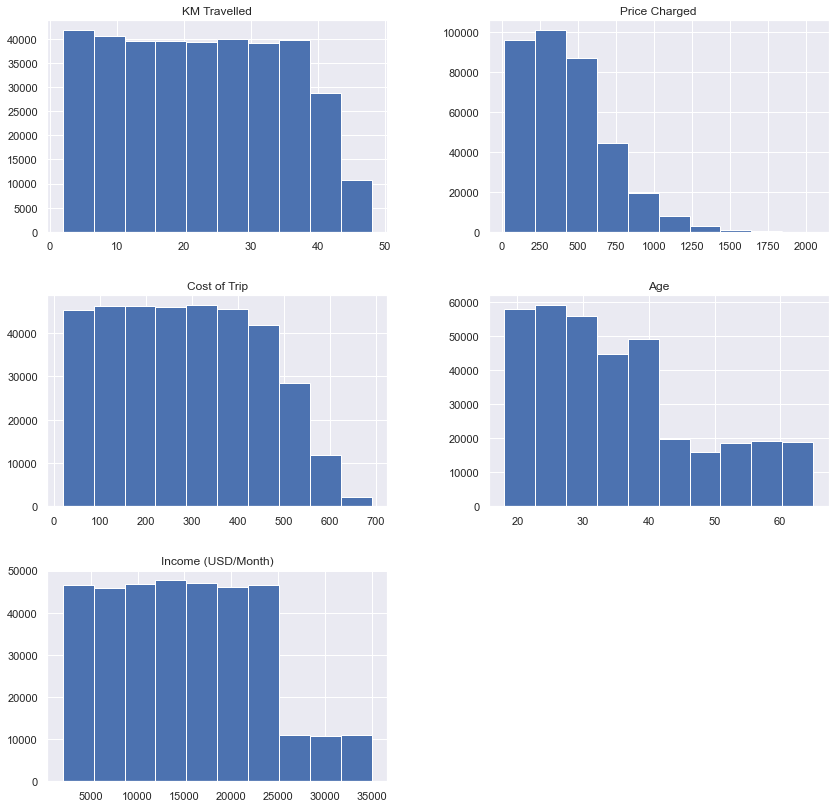

In [31]:
numerical_columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)']
all_data[numerical_columns].hist(figsize=(14,14))
plt.show()

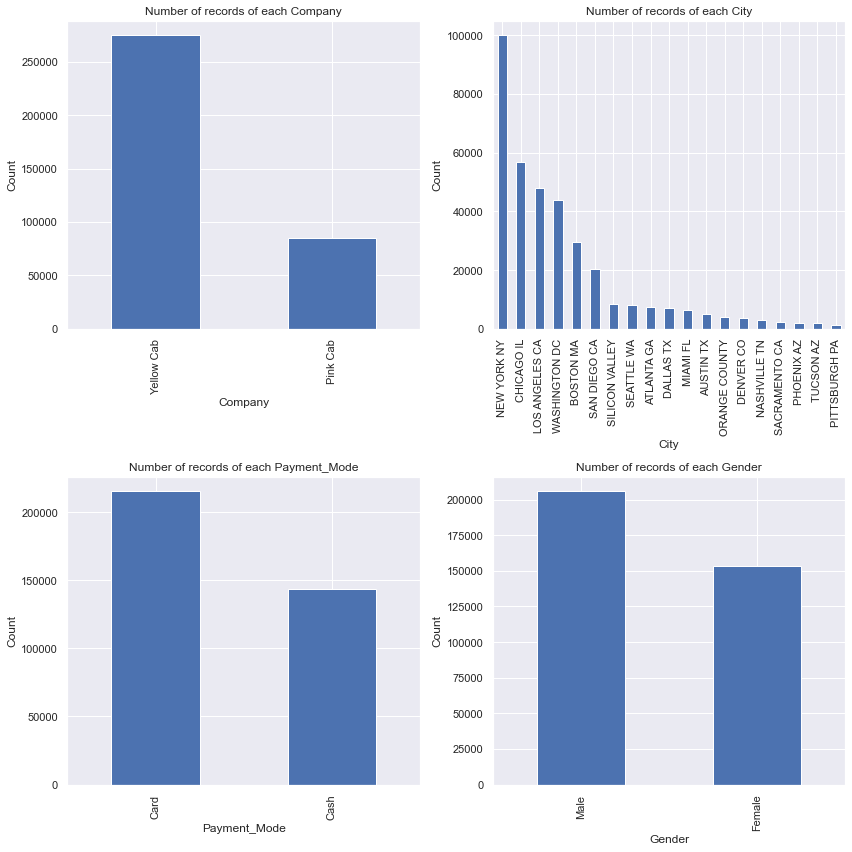

In [40]:
categorical_columns = ['Company', 'City', 'Payment_Mode', 'Gender']
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
for i, category in enumerate(categorical_columns):
    category_counts = all_data[category].value_counts()
    
    category_counts.plot(kind='bar', ax=axes[i])
    
    axes[i].set_title(f'Number of records of each {category}')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Count')

plt.tight_layout()

## Hypothesis
1. There is any seasonality in number of customers using the cab service.
2. Amount of money person spends on taxi annualy depends on income.
3. 
4. 
5. 